# Figure of station profile model evaluation


In [32]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [37]:
import seaborn as sns

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import glob
import pandas as pd 
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import pickle

%matplotlib notebook

In [4]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

#### Load model bathymetry and results

In [5]:
land_color = "#8b7765"

# load bathymetry file:
mesh = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [6]:
def find_index_ANHA12_full(transect_lons, transect_lats, ANHA12_lon=mesh_lon, ANHA12_lat=mesh_lat):
    # input:   ANHA12_lon, ANHA12_lat       --- 2400x1632 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12_lon, ANHA12_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12_lon, ANHA12_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

Sample results

In [7]:
c = nc.Dataset('/data/brogalla/run_storage/spin-up0/'+\
               'ANHA12_EXH006_2002_monthly.nc', 'r')

# Load structure from sample dataset:
lat_model = c.variables['nav_lat']
lon_model = c.variables['nav_lon']
depths_model = c.variables['deptht']
lat_model = np.array(lat_model)
lon_model = np.array(lon_model)
depths_model = np.array(depths_model)

In [8]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

#### Load GEOTRACES data

In [9]:
Mn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

In [10]:
dMn_BB1 = Mn_data['BB1'].dropna()[1:].astype('float')
dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float')
dMn_BB3 = Mn_data['BB3'].dropna()[1:].astype('float')
dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float')
dMn_CB2 = Mn_data['CB2'].dropna()[1:].astype('float')
dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float')
dMn_CB4 = Mn_data['CB4'].dropna()[1:].astype('float')
dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float')
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float')
dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float')
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float')
dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float')
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float')
dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float')
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float')
dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float')

In [11]:
std_BB1 = Mn_data['Unnamed: 8'].dropna()[1:].astype('float')
std_BB2 = Mn_data['Unnamed: 11'].dropna()[1:].astype('float')
std_BB3 = Mn_data['Unnamed: 14'].dropna()[1:].astype('float')
std_CB1 = Mn_data['Unnamed: 44'][1:].astype('float').fillna(0)[0:11]
std_CB2 = Mn_data['Unnamed: 47'].dropna()[1:].astype('float')
std_CB3 = Mn_data['Unnamed: 50'][1:].astype('float').fillna(0)[0:22]
std_CB4 = Mn_data['Unnamed: 53'].dropna()[1:].astype('float')
std_CAA1 = Mn_data['Unnamed: 17'].dropna()[1:].astype('float')
std_CAA2 = Mn_data['Unnamed: 20'].dropna()[1:].astype('float')
std_CAA3 = Mn_data['Unnamed: 23'].dropna()[1:].astype('float')
std_CAA4 = Mn_data['Unnamed: 26'].dropna()[1:].astype('float')
std_CAA5 = Mn_data['Unnamed: 29'].dropna()[1:].astype('float')
std_CAA6 = Mn_data['Unnamed: 32'].dropna()[1:].astype('float')
std_CAA7 = Mn_data['Unnamed: 35'].dropna()[1:].astype('float')
std_CAA8 = Mn_data['Unnamed: 38'].dropna()[1:].astype('float')
std_CAA9 = Mn_data['Unnamed: 41'].dropna()[1:].astype('float')

In [12]:
depth_BB1 = Mn_data['Depth.2'].dropna()
depth_BB2 = Mn_data['Depth.3'].dropna()
depth_BB3 = Mn_data['Depth.4'].dropna()
depth_CB1 = Mn_data['Depth.14'].dropna()
depth_CB2 = Mn_data['Depth.15'].dropna()
depth_CB3 = Mn_data['Depth.16'].dropna()
depth_CB4 = Mn_data['Depth.17'].dropna()
depth_CAA1 = Mn_data['Depth.5'].dropna()
depth_CAA2 = Mn_data['Depth.6'].dropna()
depth_CAA3 = Mn_data['Depth.7'].dropna()
depth_CAA4 = Mn_data['Depth.8'].dropna()
depth_CAA5 = Mn_data['Depth.9'].dropna()
depth_CAA6 = Mn_data['Depth.10'].dropna()
depth_CAA7 = Mn_data['Depth.11'].dropna()
depth_CAA8 = Mn_data['Depth.12'].dropna()
depth_CAA9 = Mn_data['Depth.13'].dropna()

In [13]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values

In [14]:
profile_colors = ['#ff4949', '#01b9ff']

In [15]:
bottom_depths =[np.amax(d) for d in [depth_CAA1, depth_CAA2, depth_CAA3, depth_CAA4, depth_CAA5, depth_CAA6, \
                            depth_CAA7, depth_CAA8, depth_CAA9, depth_CB1, depth_CB2, depth_CB3, depth_CB4]]

In [16]:
mask = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh_zgr10.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

In [17]:
def station_profile(ax, dMn, stn_depths, stn_std, name, month, \
                    lons=lons, lats=lats, stn_names=stn_names, depths_model=depths_model):
    ax.invert_yaxis()

    profile_colors = ['#ff4949', '#01b9ff']
#     profile_colors = ['#ff4949', '#617c84']
   
    # observations:
    dMn_obs   = np.array(dMn)
    depth_obs = np.array(stn_depths)
#     ax.plot(dMn_obs, depth_obs, zorder=2, linestyle='-', linewidth=2.0, color=profile_colors[0])
    ax.scatter(dMn_obs, depth_obs, zorder=3, edgecolors='k', color=profile_colors[0])
    ax.fill_betweenx(depth_obs, dMn_obs-stn_std, dMn_obs+stn_std, zorder=2, color=profile_colors[0])

    # model:
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j = find_index_ANHA12_full(lon_station, lat_station)
    model_i = int(model_i); model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);

    mn_ij1 = mn_dis1[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij2 = mn_dis2[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij3 = mn_dis3[month, 0, :, model_stni, model_stnj]*10**9
    mn_ij1_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij1)
    mn_ij2_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij2)
    mn_ij3_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij3)
    
    ax.plot(mn_ij1_masked, depths_model, zorder=1, linestyle='-', linewidth=2.5, color=profile_colors[1])
    ax.scatter(mn_ij1_masked, depths_model, zorder=2, edgecolors='k', color=profile_colors[1], s=30)
    
#     if name in ['CAA4', 'CAA5', 'CAA6']:
#         if name == 'CAA4':
#             ax.plot(mn_ij2_masked[16:-1], depths_model[16:-1], zorder=3, linestyle='--', dashes=(2, 0.8), linewidth=2.0, color=profile_colors[1])
#         else:
#             ax.plot(mn_ij2_masked[18:-1], depths_model[18:-1], zorder=3, linestyle='--', dashes=(2, 0.8), linewidth=2.0, color=profile_colors[1])
    ax.plot(mn_ij3_masked, depths_model, zorder=3, linestyle='--', linewidth=1.5, color='r')

    ax.set_ylim([depth_obs[-1]+20, -10])
#     ax.set_ylim([200,-10])
    ax.set_xlim([-2, 15])
    ax.xaxis.tick_top()    
    ax.xaxis.set_label_position('top') 
    ax.set_xticks([0,5,10,15])
    
    #top patch:
    x0_top     = -10.5
    y0_top     = -11 - 0.2*depth_obs[-1]
    width_top  = 15+12.5
    height_top = 0.2*depth_obs[-1]
    box_top    = mpl.patches.Rectangle((x0_top,y0_top), width_top, height_top, facecolor='w', clip_on=False, \
                                      alpha=0.7, zorder=1)
    ax.add_patch(box_top)
    
    #left side patch:
    x0_side     = -10.5
    y0_side     = -11
    width_side  = 15+12.5
    height_side = depth_obs[-1]+20+10
    box_side    = mpl.patches.Rectangle((x0_side,y0_side), width_side, height_side, facecolor='w', clip_on=False, \
                                       alpha=0.7, zorder=1)
    ax.add_patch(box_side)
    
    # add name of station to bottom right corner of each profile:
    bottom = depth_obs[-1]+30
    ax.text(6, bottom*0.8, name, fontsize=10)
    
    return

In [20]:
file1 = 'ANHA12_EXH006_2002_monthly.nc'
file2 = 'ANHA12_EXH006_2002_monthly.nc'
file3 = 'ANHA12_EXH006_2002_monthly.nc'

Mn_model1 = nc.Dataset('/data/brogalla/run_storage/spin-up2/'+file1)
Mn_model2 = nc.Dataset('/data/brogalla/run_storage/spin-up0/'+file2)
Mn_model3 = nc.Dataset('/data/brogalla/run_storage/spin-up0/'+file3)

mn_dis1 = np.array(Mn_model1.variables['dissolmn'])
mn_dis2 = np.array(Mn_model2.variables['dissolmn'])
mn_dis3 = np.array(Mn_model3.variables['dissolmn'])

In [21]:
month=8

<IPython.core.display.Javascript object>


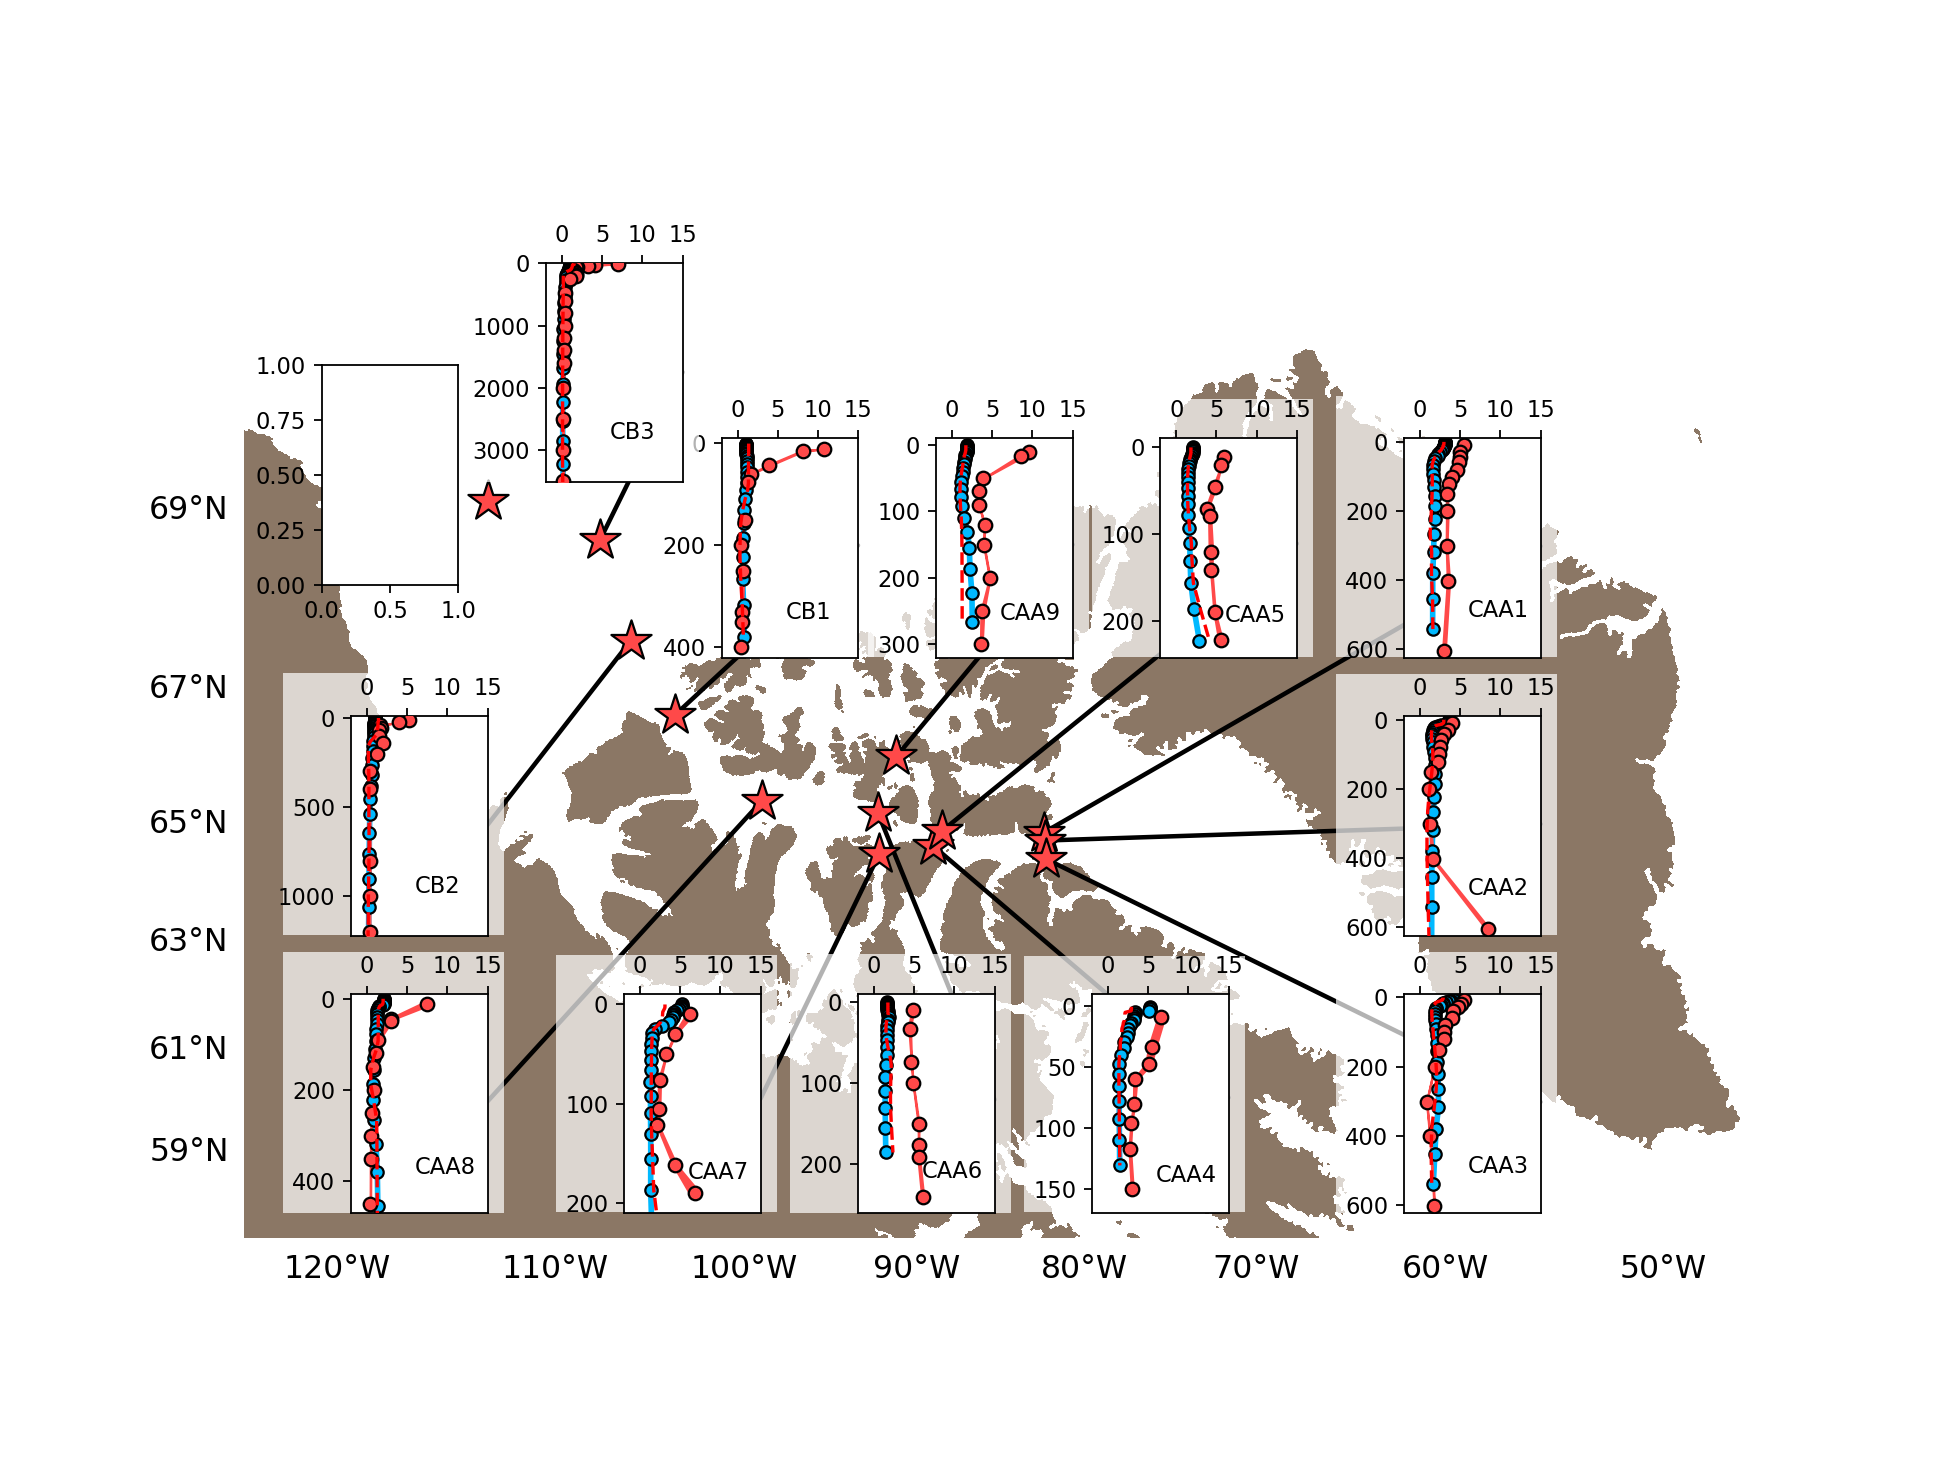

In [22]:
fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/mn-reference.pickle','rb'))

# profile plots:
ax1 = plt.axes([0.72, 0.55, 0.07, 0.15])
ax2 = plt.axes([0.72, 0.36, 0.07, 0.15]) #CAA1
ax3 = plt.axes([0.72, 0.17, 0.07, 0.15]) 
ax4 = plt.axes([0.56, 0.17, 0.07, 0.15])
ax5 = plt.axes([0.595, 0.55, 0.07, 0.15])
ax6 = plt.axes([0.44, 0.17, 0.07, 0.15]) 
ax7 = plt.axes([0.32, 0.17, 0.07, 0.15])
ax8 = plt.axes([0.18, 0.17, 0.07, 0.15])
ax9 = plt.axes([0.48, 0.55, 0.07, 0.15])
ax10 = plt.axes([0.37,  0.55, 0.07, 0.15]) #CB1
ax11 = plt.axes([0.18, 0.36, 0.07, 0.15])
ax12 = plt.axes([0.28,  0.67, 0.07, 0.15])
ax13 = plt.axes([0.165, 0.60, 0.07, 0.15])

axes_list=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]

for axi in axes_list:
    axi.tick_params(labelsize=10)
    
fig1 = station_profile(ax1, dMn_CAA1, depth_CAA1, std_CAA1, 'CAA1', month)
fig2 = station_profile(ax2, dMn_CAA2, depth_CAA2, std_CAA2, 'CAA2', month)
fig3 = station_profile(ax3, dMn_CAA3, depth_CAA3, std_CAA3, 'CAA3', month)
fig4 = station_profile(ax4, dMn_CAA4, depth_CAA4, std_CAA4, 'CAA4', month)
fig5 = station_profile(ax5, dMn_CAA5, depth_CAA5, std_CAA5, 'CAA5', month)
fig6 = station_profile(ax6, dMn_CAA6, depth_CAA6, std_CAA6, 'CAA6', month)
fig7 = station_profile(ax7, dMn_CAA7, depth_CAA7, std_CAA7, 'CAA7', month)
fig8 = station_profile(ax8, dMn_CAA8, depth_CAA8, std_CAA8, 'CAA8', month)
fig9 = station_profile(ax9, dMn_CAA9, depth_CAA9, std_CAA9, 'CAA9', month)
fig10 = station_profile(ax10, dMn_CB1, depth_CB1, std_CB1, 'CB1', month)
fig11 = station_profile(ax11, dMn_CB2, depth_CB2, std_CB2, 'CB2', month)
fig12 = station_profile(ax12, dMn_CB3, depth_CB3, std_CB3, 'CB3', month)
# fig13 = station_profile(ax13, dMn_CB4, depth_CB4, std_CB4, 'CB4', month)

x_GEOTRACES, y_GEOTRACES = proj(lons[5:18], lats[5:18]) # leave out BB and K stations
ax.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=350,zorder=5, edgecolor='k', color=profile_colors[0])

# create lines connecting the profiles:
coordsA = "data"
coordsB = "data"
for i in range(len(stn_names[5:18])):
    xy1 = (x_GEOTRACES[i], y_GEOTRACES[i])
    xy2 = (15, bottom_depths[i]/2)
    axB = axes_list[i]
    con = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax, axesB=axB, \
                          coordsA=coordsA, coordsB=coordsB, arrowstyle="-", linewidth=2, zorder=2)
    ax.add_artist(con)
    
ax.plot(0, 0, linewidth=4.5, color=profile_colors[0], label="Observations")
ax.plot(0, 0, linewidth=4.5, color=profile_colors[1], label="Model")
ax.set_frame_on(False)
# 
# plt.savefig('/ocean/brogalla/GEOTRACES/figures/Mn_profile_evaluation-20191023.png', bbox_inches='tight', dpi=300)

### Mn vs. Salinity relationship

In [34]:
S_obs    = np.arange(24, 36, 1)
dmn_obs1 = -0.601*S_obs + 21.9 # CB
dmn_obs2 = -1.26*S_obs + 45.2  # CAA

In [35]:
S_file  = nc.Dataset('/data/brogalla/ANHA12/ANHA12-EXH006_5d_gridT_y2002m08d28.nc')
S_model = np.array(S_file.variables['vosaline'])

In [36]:
def model_data(name, lons=lons, lats=lats, stn_names=stn_names, S_model=S_model):
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    
    # Find station index
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j = find_index_ANHA12_full(lon_station, lat_station)
    model_i = int(model_i); model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);

    mn_ij1  = mn_dis1[8, 0, 0:17, model_stni, model_stnj]*10**9
    S_ij1   = S_model[0, 0:17, model_i, model_j]
    dmn_stn = np.ma.masked_where((tmask[0:17,model_i, model_j] < 0.1), mn_ij1)   
    S_stn   = np.ma.masked_where((tmask[0:17,model_i, model_j] < 0.1), S_ij1)   

    return dmn_stn, S_stn

<IPython.core.display.Javascript object>


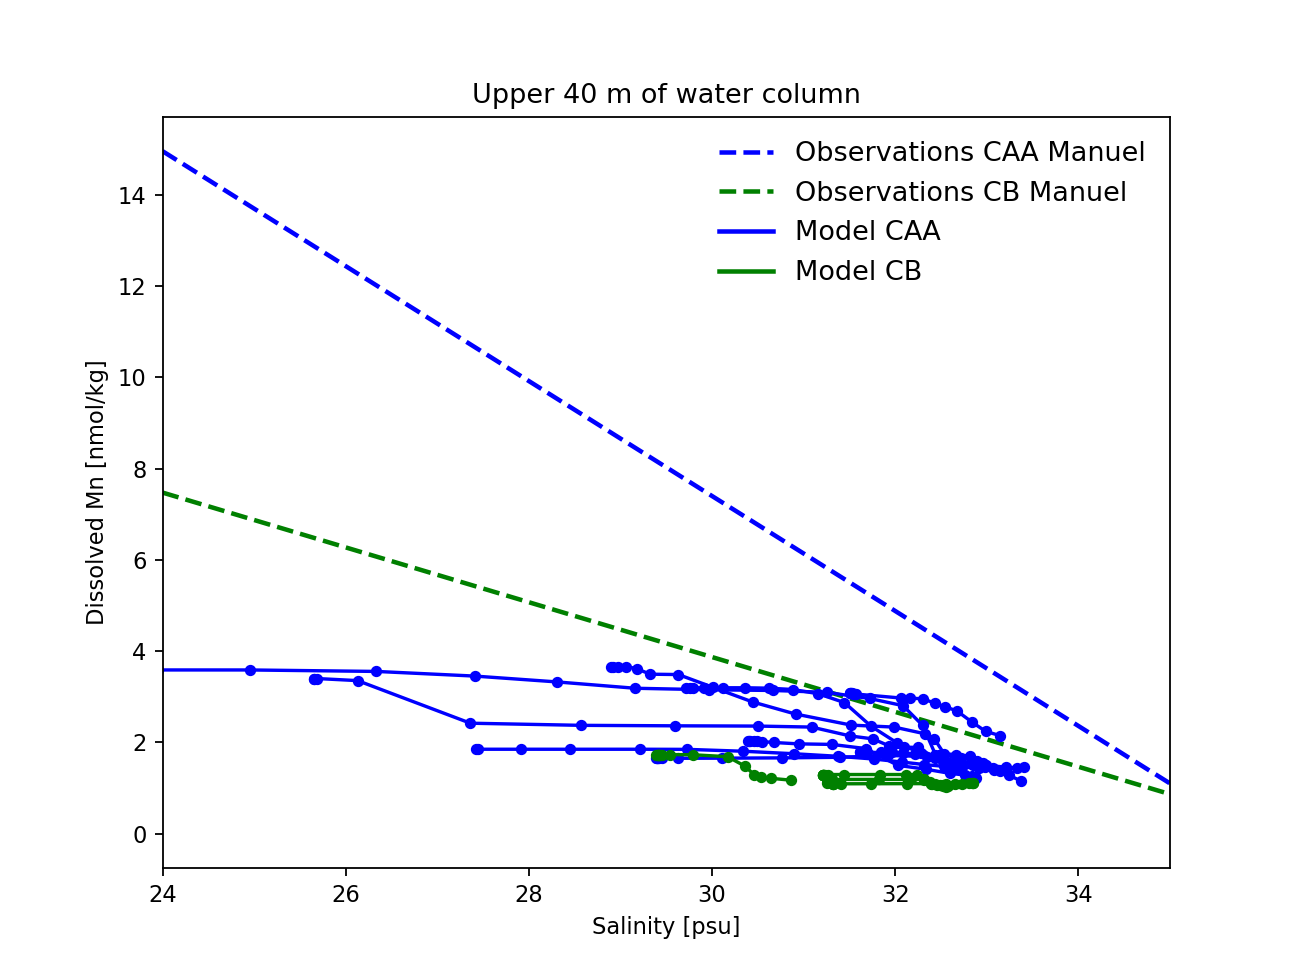

In [73]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(S_obs, dmn_obs1, '--g', linewidth=2.0)
ax.plot(S_obs, dmn_obs2, '--b', linewidth=2.0)

names = ['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9', \
            'CB1','CB2','CB3','CB4']
for name in names:
    dmn_stn, S_stn = model_data(name)
    if name[0:3] == 'CAA':
        ax.plot(S_stn, dmn_stn, '-b')
        ax.plot(S_stn, dmn_stn, '.b', markersize=8)
    else:
        ax.plot(S_stn, dmn_stn, '-g')
        ax.plot(S_stn, dmn_stn, '.g', markersize=8)

ax.plot([0,0],[0,0], '--b', linewidth=2.0, label='Observations CAA Manuel')
ax.plot([0,0],[0,0], '--g', linewidth=2.0, label='Observations CB Manuel')
ax.plot([0,0],[0,0], '-b', linewidth=2.0, label='Model CAA')
ax.plot([0,0],[0,0], '-g', linewidth=2.0, label='Model CB')

ax.set_title('Upper 40 m of water column')
ax.set_xlim([24, 35])
ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Dissolved Mn [nmol/kg]')
ax.legend(frameon=False, fontsize=12)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/salinity_dmn.png')

In [ ]:
plt.subplots(figsize=(11,11))
with sns.axes_style("white"):
    jp = sns.jointplot(x=S_model[0,0:17,1480:2180:10, 160:800:10], y=mn_dis1[8,0,0:17,::10,::10]*10**9, \
                       kind="kde", color="k", xlim=(24,35), ylim=(0,15))
    
    jp.ax_joint.plot(S_obs, dmn_obs1, '-w', linewidth=4)    
    jp.ax_joint.plot(S_obs, dmn_obs2, '-w', linewidth=4)    
    jp.ax_joint.plot(S_obs, dmn_obs1, '-g', linewidth=3)    
    jp.ax_joint.plot(S_obs, dmn_obs2, '-b', linewidth=3)    

    jp.plot_joint(plt.scatter, c="k", s=1, linewidth=1, marker='.')
    jp.ax_joint.collections[0].set_alpha(0)
    jp.set_axis_labels('Salinity [psu]', "Dissolved Mn [nmol/kg]")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


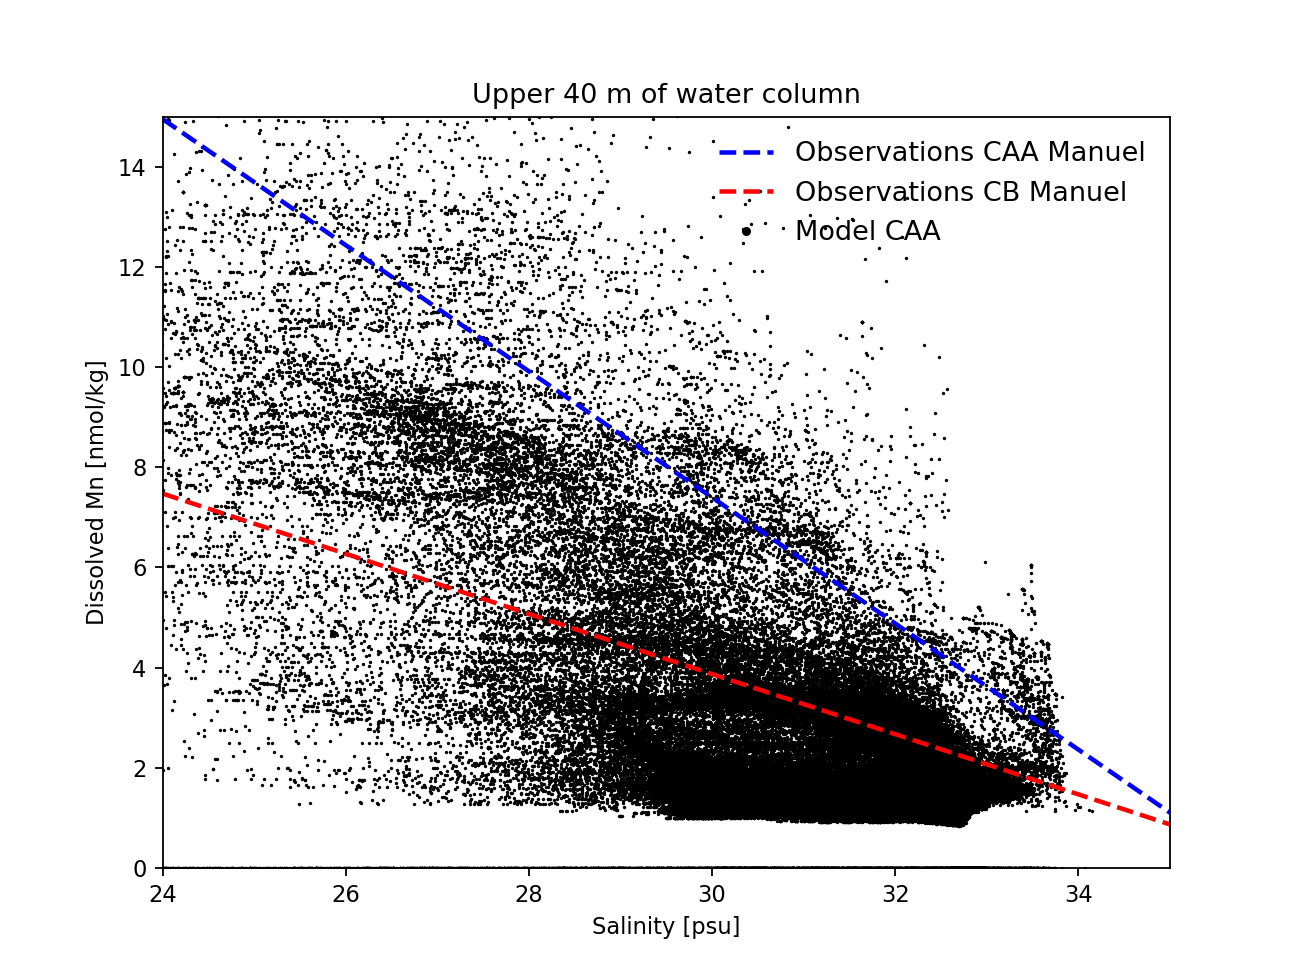

In [38]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for depth in range(0,17):
    ax.plot(S_model[0,depth,1480:2180:5, 160:800:5], mn_dis1[8,0,depth,::5,::5]*10**9, '.k', markersize=1)

ax.plot(S_obs, dmn_obs1, '--r', linewidth=2.0)
ax.plot(S_obs, dmn_obs2, '--b', linewidth=2.0)
    
ax.plot([0,0],[0,0], '--b', linewidth=2.0, label='Observations CAA Manuel')
ax.plot([0,0],[0,0], '--r', linewidth=2.0, label='Observations CB Manuel')
ax.plot([0,0],[0,0], '.k', linewidth=2.0, label='Model CAA')

ax.set_title('Upper 40 m of water column')
ax.set_xlim([24, 35])
ax.set_ylim([0, 15])
ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Dissolved Mn [nmol/kg]')
ax.legend(frameon=False, fontsize=12)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/salinity_dmn.png')